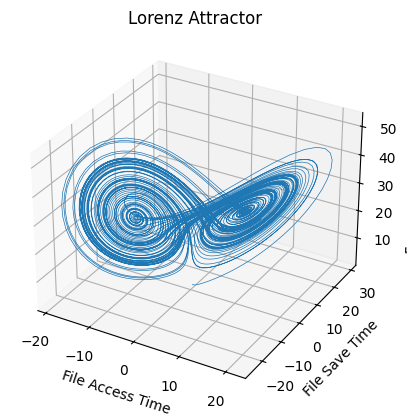

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def lorenz(xyz, *, s=10, r=28, b=2.667): # s = storage size, r = file size, b = file load time
    """
    Parameters
    ----------
    xyz : array-like, shape (3,)
       Point of interest in three-dimensional space.
    s, r, b : float
       Parameters defining the Lorenz attractor.

    Returns
    -------
    xyz_dot : array, shape (3,)
       Values of the Lorenz attractor's partial derivatives at *xyz*.
    """
    x, y, z = xyz
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return np.array([x_dot, y_dot, z_dot])


dt = 0.01
num_steps = 10000

xyzs = np.empty((num_steps + 1, 3))  # Need one more for the initial values
xyzs[0] = (0., 1., 1.05)  # Set initial values
# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i]) * dt

# Plot
ax = plt.figure().add_subplot(projection='3d')

ax.plot(*xyzs.T, lw=0.5)
ax.set_xlabel("File Access Time")
ax.set_ylabel("File Save Time")
ax.set_zlabel("Fragmentation Time")
ax.set_title("Lorenz Attractor")

plt.show()

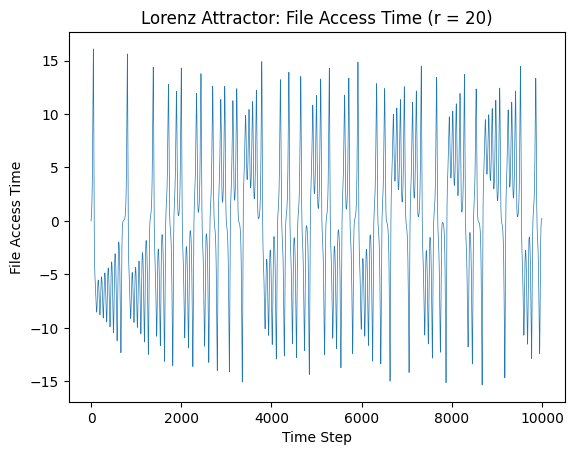

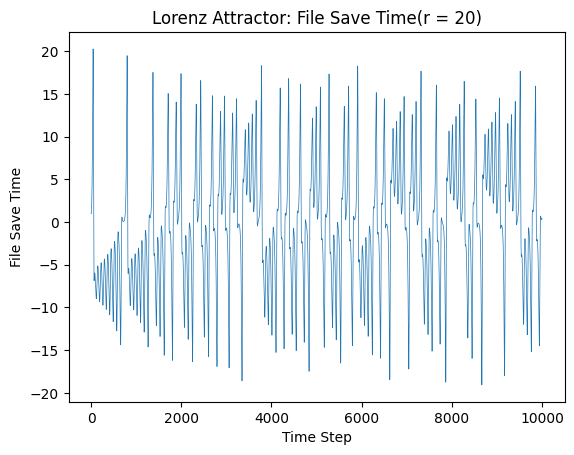

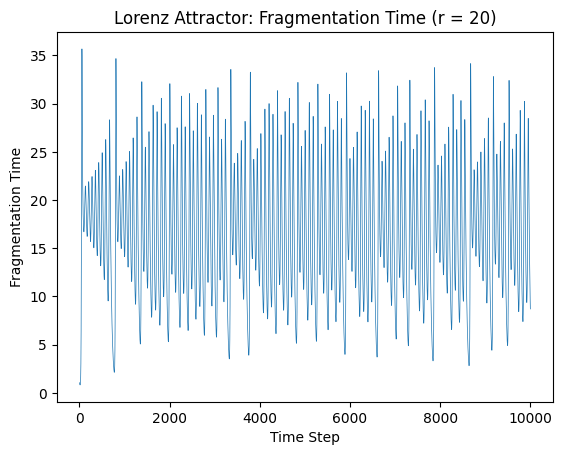

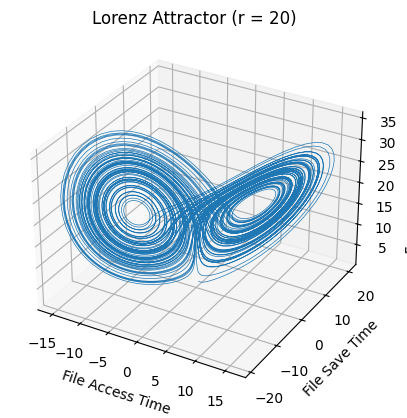

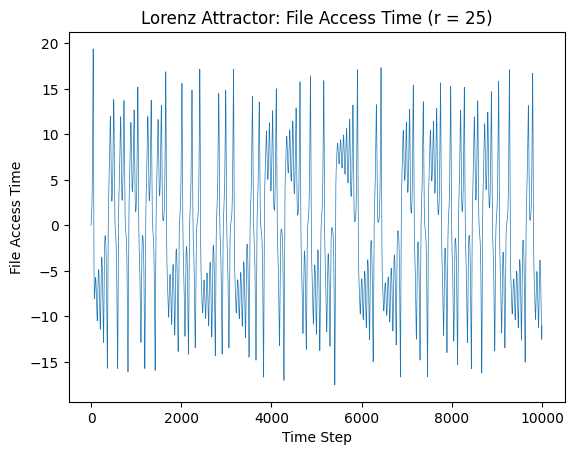

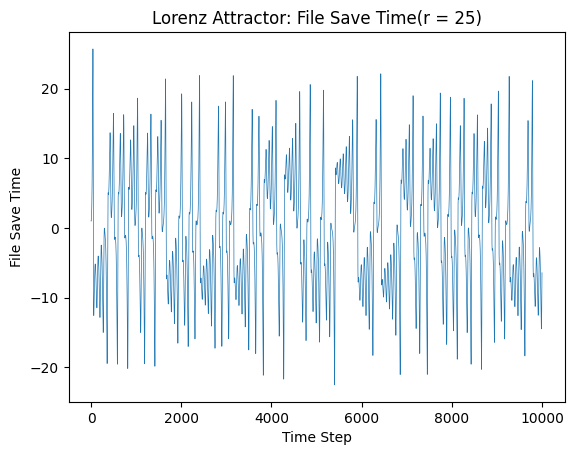

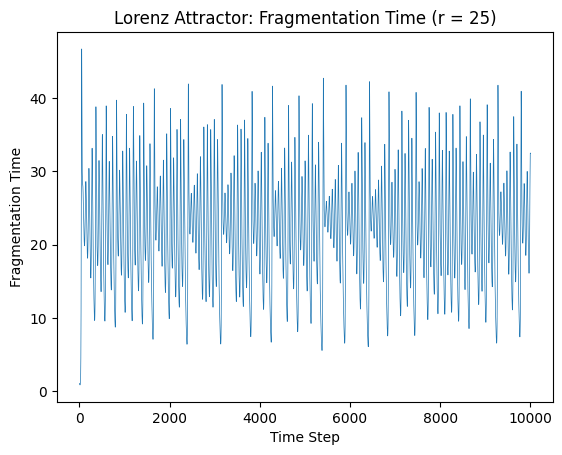

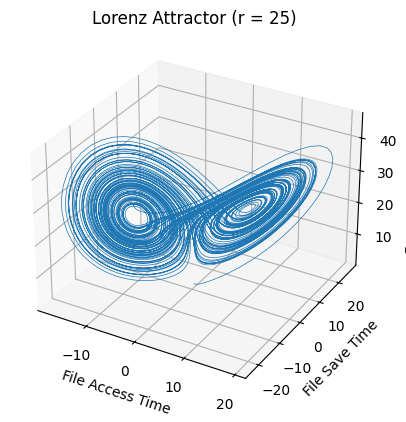

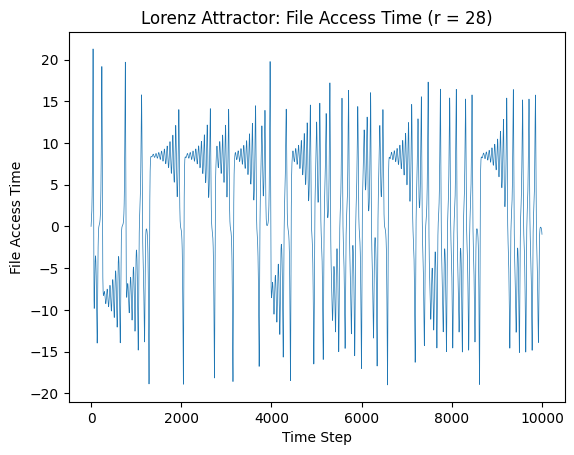

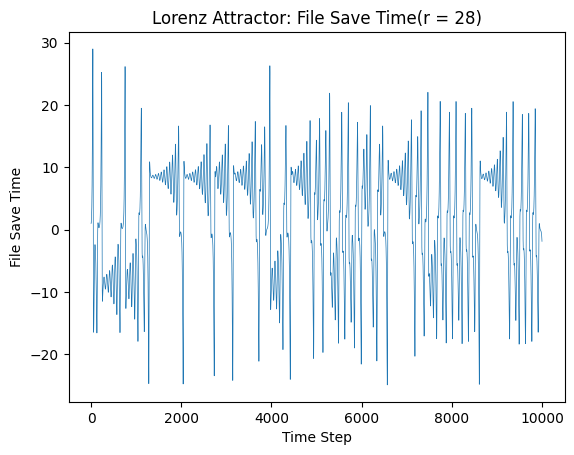

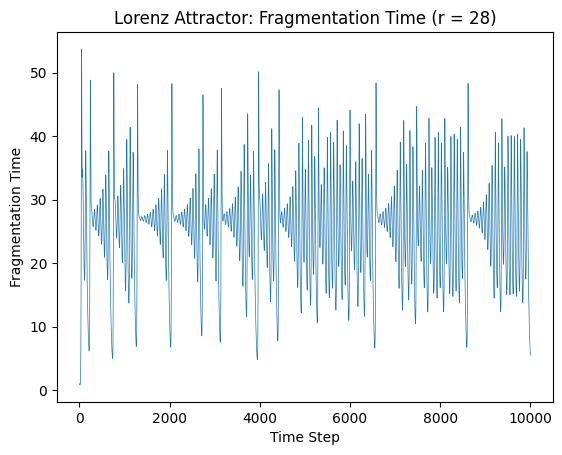

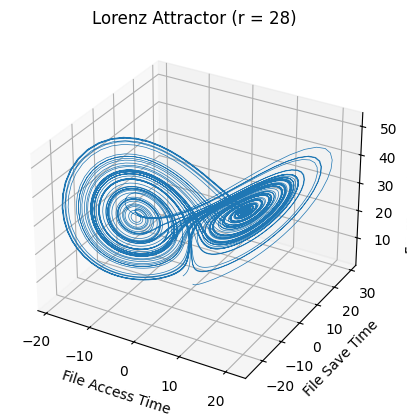

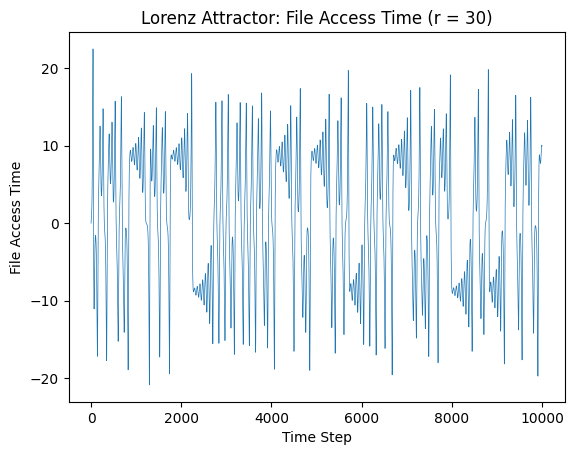

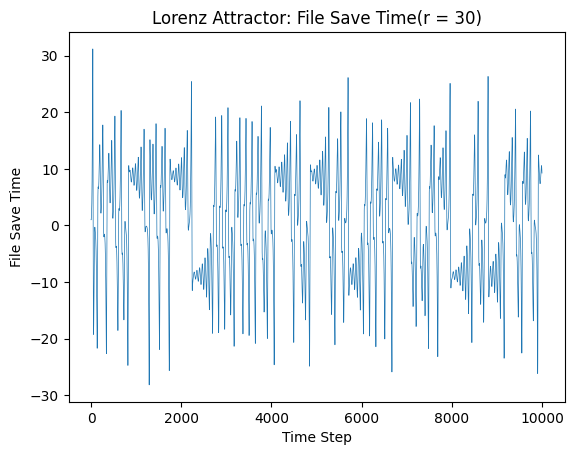

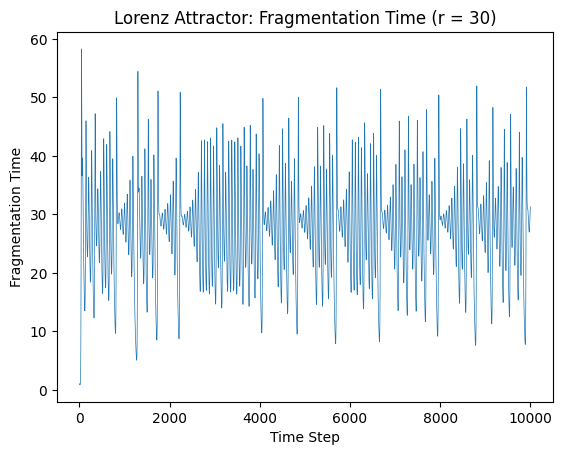

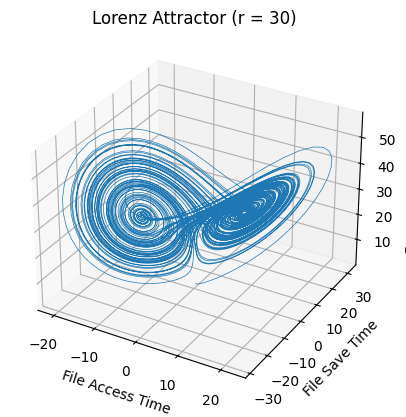

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def lorenz(xyz, *, s=10, r=28, b=(8/3)):
    """
    Parameters
    ----------
    xyz : array-like, shape (3,)
       Point of interest in three-dimensional space.
    s, r, b : float
       Parameters defining the Lorenz attractor.

    Returns
    -------
    xyz_dot : array, shape (3,)
       Values of the Lorenz attractor's partial derivatives at *xyz*.
    """
    x, y, z = xyz
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return np.array([x_dot, y_dot, z_dot])

dt = 0.01
num_steps = 10000
rs = [20, 25, 28, 30]  # Define the values of r to plot

# Define the threshold for the system being too slow
slow_threshold = 100  # Adjust this value as needed

# Loop over the values of r
for r in rs:
    xyzs = np.empty((num_steps + 1, 3))  # Need one more for the initial values
    xyzs[0] = (0., 1., 1.05)  # Set initial values
    # Step through "time", calculating the partial derivatives at the current point
    # and using them to estimate the next point
    for i in range(num_steps):
        xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i], r=r) * dt

        # Check if the system is too slow
        if max(xyzs[i + 1]) > slow_threshold:
            print(f"Alert: System too slow at time step {i + 1}!")
            break  # Stop the simulation if the system is too slow

    # Plot the x component
    fig, ax = plt.subplots()
    ax.plot(xyzs[:, 0], lw=0.5)
    ax.set_xlabel("Time Step")
    ax.set_ylabel("File Access Time")
    ax.set_title(f"Lorenz Attractor: File Access Time (r = {r})")

    # Plot the y component
    fig, ax = plt.subplots()
    ax.plot(xyzs[:, 1], lw=0.5)
    ax.set_xlabel("Time Step")
    ax.set_ylabel("File Save Time")
    ax.set_title(f"Lorenz Attractor: File Save Time(r = {r})")

    # Plot the z component
    fig, ax = plt.subplots()
    ax.plot(xyzs[:, 2], lw=0.5)
    ax.set_xlabel("Time Step")
    ax.set_ylabel("Fragmentation Time")
    ax.set_title(f"Lorenz Attractor: Fragmentation Time (r = {r})")

    # Plot the 3D attractor
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot(*xyzs.T, lw=0.5)
    ax.set_xlabel("File Access Time")
    ax.set_ylabel("File Save Time")
    ax.set_zlabel("Fragmentation Time")
    ax.set_title(f"Lorenz Attractor (r = {r})")

plt.show()
